# Support Vector Machines: Clasificación Lineal

El siguiente ejemplo utiliza la librería Scikit-Learn para crear un dataset sintético con make_blobs y luego resolverlo con una SVM para la clasificación.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Comenzamos creando el dataset sintético con la función make_blobs de Scikit-Learn. Esta función genera un conjunto de puntos aleatorios, agrupados en clusters, que se pueden utilizar para probar algoritmos de clustering y clasificación.

In [126]:
# Número de muestras
n_samples = 200

# Crear el dataset sintético con tres características (dimensiones)
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=42)

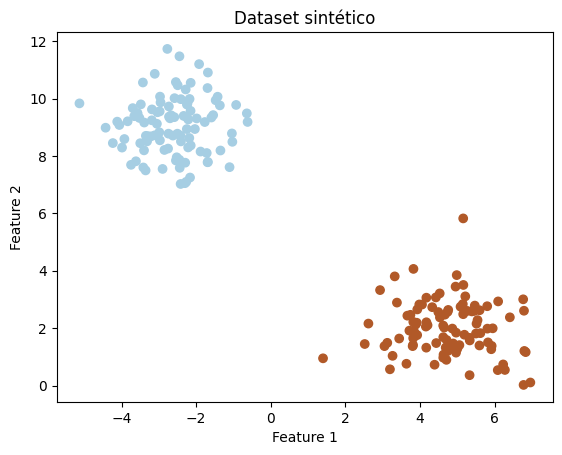

In [127]:
# Visualizamos los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset sintético')
plt.show()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dada la forma de los datos, vamos a emplear un SVM con Kernel Lineal para resolver el problema de clasificación.

In [129]:
# Creamos el SVM y lo entrenamos
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predecimos los valores para el conjunto de test
y_pred = svm_classifier.predict(X_test)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo SVM: {accuracy * 100:.2f}%')

Precisión del modelo SVM: 100.00%


Visualizamos los datos de entrenamiento, los de test y la línea de decisión.

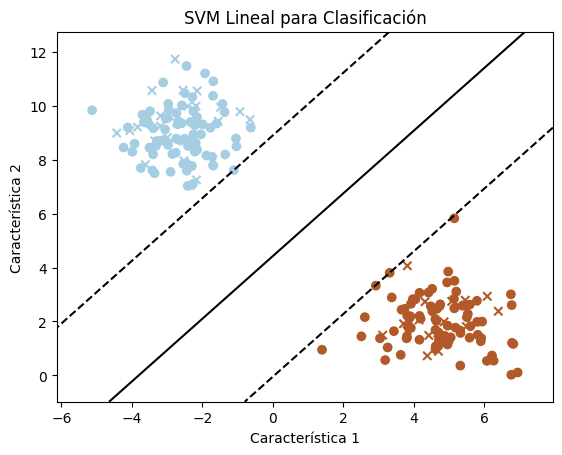

In [131]:

# Crear una malla para la visualización
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Calcular las predicciones para cada punto en la malla
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar los datos de entrenamiento, los puntos de prueba y la línea de decisión
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x')
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.title('SVM Lineal para Clasificación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Support Vector Machines: Clasificación No Lineal

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [133]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

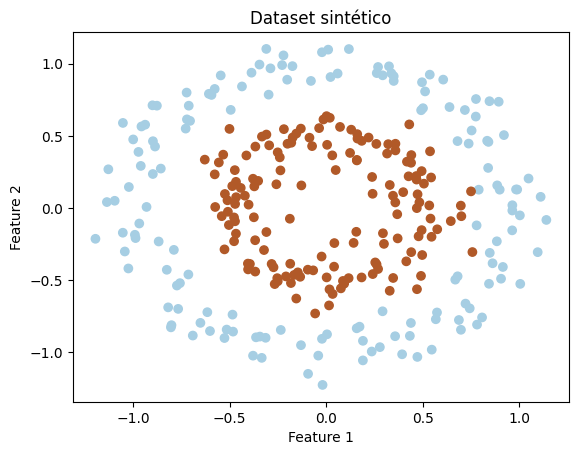

In [134]:
# Visualizamos los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset sintético')
plt.show()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Utilizamos un SVM con el kernel de base radial (RBF) para resolver el problema de clasificación.

In [136]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo SVM con kernel RBF: {accuracy * 100:.2f}%')

Precisión del modelo SVM con kernel RBF: 100.00%


C:\Users\icira\AppData\Local\Temp\ipykernel_22296\710114991.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', edgecolors='k')


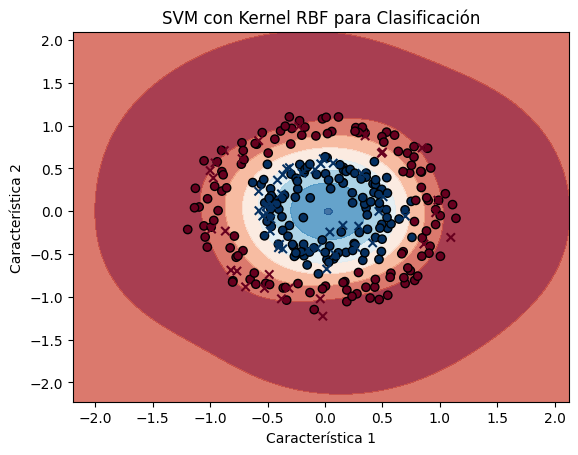

In [138]:
h = .02  # Tamaño de paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, marker='o', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', edgecolors='k')

plt.title('SVM con Kernel RBF para Clasificación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

La imagen muestra un gráfico de dispersión que representa el resultado de la clasificación.

Los puntos en el gráfico representan muestras o instancias individuales que han sido clasificadas por el modelo SVM. Podemos ver dos grupos claramente diferenciados:

La transición suave entre el azul y el rojo indica la naturaleza no lineal de la frontera de decisión creada por el kernel RBF, que permite al modelo SVM clasificar los datos que no son linealmente separables. El color más oscuro en el centro de cada grupo representa una mayor confianza en la clasificación de esos puntos, mientras que los colores más claros alrededor de los bordes pueden representar un menor grado de certeza.